# Introduction

    With the increasing popularity of smartphones and the Internet, the impact of mobile phone applications on people's lives is also growing. In different platforms and different mobile phone systems, tens of thousands of applications can be selected and used by people. As a programmer, the development of mobile phone applications is a high-quality job choice. However, how to stand out in many applications is a problem worthy of our consideration.

    Therefore, in this project, we will use the rigorous steps of data science to conduct a series of analyses of Apple Store applications. We will focus on the characteristics of high rating applications and discuss the impact of price and application size on application evaluation.

# Start Up

First We need to import the python libraries that we need in the later processes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# Data Collecting

After everything is setted up, we can download our data from: 
https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps?select=AppleStore.csv

    The basic process of loading data from a .csv file into a Pandas DataFrame is achieved using the “read_csv” function in Pandas. Remember to make sure that the file path is correct.

The meanning of the each column is list below:

"id" : App ID

"track_name": App Name

"size_bytes": Size (in Bytes)

"currency": Currency Type

"price": Price amount

"ratingcounttot": User Rating counts (for all version)

"ratingcountver": User Rating counts (for current version)

"user_rating" : Average User Rating value (for all version)

"userratingver": Average User Rating value (for current version)

"ver" : Latest version code

"cont_rating": Content Rating

"prime_genre": Primary Genre

"sup_devices.num": Number of supporting devices

"ipadSc_urls.num": Number of screenshots showed for display

"lang.num": Number of supported languages

"vpp_lic": Vpp Device Based Licensing Enabled

In [2]:
data = pd.read_csv('datasets_30069_39285_AppleStore.csv')
data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


Now we need to make sure what the data types for each column in our dataframe for future processing.

In [3]:
data.dtypes

Unnamed: 0            int64
id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

# Data Processing

    After collecting the data and had confirmed the data types, We can now rename each column and remove the unnecessary columns that we don't need.So we can make our data more readable.

The extra data we do not need are: 

1. Unnamed:0 (The extra index column)

2. App Id

3. Currency

4. Latest version code

5. Vpp Device Based Licensing Enable

6. Number of supporting devices

7. Number of screenshots showed for display

    Here, we can see the data type of Content Rating is Object and we hope it to be integer. Therefore, we remove the last character which is the '+' sign and convert the whole column to integer.

In [4]:
data = data.drop(columns = ['Unnamed: 0'])
data = data.drop(columns = ['id'])
data = data.drop(columns = ['currency'])
data = data.drop(columns = ['ver'])
data = data.drop(columns = ['vpp_lic'])
data = data.drop(columns = ['sup_devices.num'])
data = data.drop(columns = ['ipadSc_urls.num'])
data = data.rename(columns = {'track_name': 'App_Name', 'size_bytes':'App_Size', 'price':'App_Price', 'rating_count_tot':'User_Rating_Count_All',
                             'rating_count_ver':'User_Rating_Count_Curr', 'user_rating':'Average_Rating_All','user_rating_ver':'Average_Rating_Curr',
                             'cont_rating':'Content_Rating', 'prime_genre':'Primary_Genre', 'lang.num':'Language_Support_Number'})

data['Content_Rating'] = data['Content_Rating'].map(lambda x : str(x)[:-1])
data['Content_Rating'] = data['Content_Rating'].map(lambda x : int(x))
data.head()

,App_Name,App_Size,App_Price,User_Rating_Count_All,User_Rating_Count_Curr,Average_Rating_All,Average_Rating_Curr,Content_Rating,Primary_Genre,Language_Support_Number
0,PAC-MAN Premium,100788224,3.99,21292,26,4.0,4.5,4,Games,10
1,Evernote - stay organized,158578688,0.00,161065,26,4.0,3.5,4,Productivity,23
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,2822,3.5,4.5,4,Weather,3
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,649,4.0,4.5,12,Shopping,9
4,Bible,92774400,0.00,985920,5320,4.5,5.0,4,Reference,45


To make our data more accuary, we wants to drop all the apps with 0 user rating count. If the User_Rating_Count is 0, it can not tell us whether this App is good or not.

In [5]:
no_rating = data[data['User_Rating_Count_All'] == 0].index
data.drop(no_rating, inplace = True)
data.head()

,App_Name,App_Size,App_Price,User_Rating_Count_All,User_Rating_Count_Curr,Average_Rating_All,Average_Rating_Curr,Content_Rating,Primary_Genre,Language_Support_Number
0,PAC-MAN Premium,100788224,3.99,21292,26,4.0,4.5,4,Games,10
1,Evernote - stay organized,158578688,0.00,161065,26,4.0,3.5,4,Productivity,23
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,2822,3.5,4.5,4,Weather,3
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,649,4.0,4.5,12,Shopping,9
4,Bible,92774400,0.00,985920,5320,4.5,5.0,4,Reference,45


In [6]:
data.dtypes

App_Name                    object
App_Size                     int64
App_Price                  float64
User_Rating_Count_All        int64
User_Rating_Count_Curr       int64
Average_Rating_All         float64
Average_Rating_Curr        float64
Content_Rating               int64
Primary_Genre               object
Language_Support_Number      int64
dtype: object

# Analysising

    So far, we have dropped all the unnecssary data and converted the remaining data to a readable name.

    In total 7197 apps information are collected and 23 different Genre for those apps.We want to know how does those Genre distribute in the total popuplation and which kind of apps is the most popular in the Apple Store. Therefore, I plot 5 simple graph to show to population distribution of each Genre.

    Through these five graphs, we can simply see the proportion of different types of applications in all applications and in different rankings without too complicated analysis. Also, we can see which Genre is most popular and how does price and size affect rating count count and average rating.
    
    From the first graph we can we see that Games Genre plays the most important role in the total population since it weights around 50% of the total population. However, we still need to know whether is it have the most rating count. Here I believe the rating count is related to the number of user. Also, the evaluation is important to determine whether the apps are good or not.
    
    Therefore, for the second graph, I sorted the data by user rating count and the third graph by averge rating. The result shows that Games Apps earn most of user and high rating in most of the times. The price of the games are not high but with the greatest app size, 49/50 apps in top 50 size apps are Games App.

In [7]:
# number of apps in Apple Store 
len(data)

6268

Text(0, 0.5, 'Num of Apps')

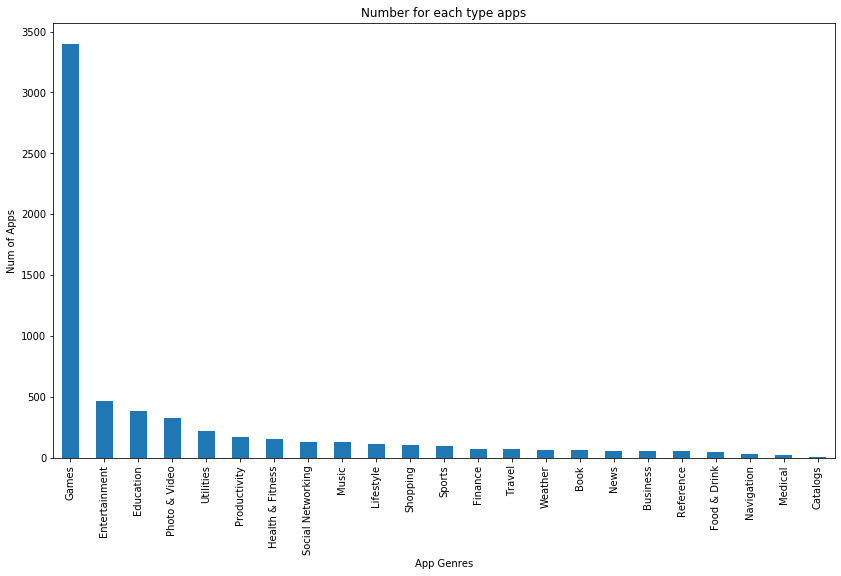

In [8]:
data['Primary_Genre'].value_counts().plot(kind = 'bar',figsize=(14,8), title="Number for each type apps")
plt.xlabel("App Genres")  
plt.ylabel("Num of Apps")

Text(0, 0.5, 'Num of Apps')

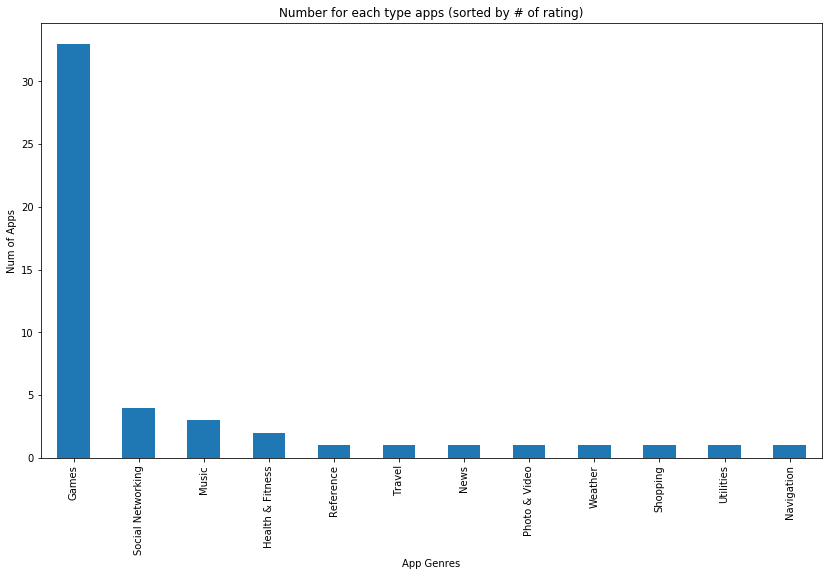

In [9]:
sorted_data = data.sort_values(by=['User_Rating_Count_All'],ascending=False)
sorted_data['Primary_Genre'][0:50].value_counts().plot(kind = 'bar',figsize=(14,8), title="Number for each type apps (sorted by # of rating)")
plt.xlabel("App Genres")  
plt.ylabel("Num of Apps")

Text(0, 0.5, 'Num of Apps')

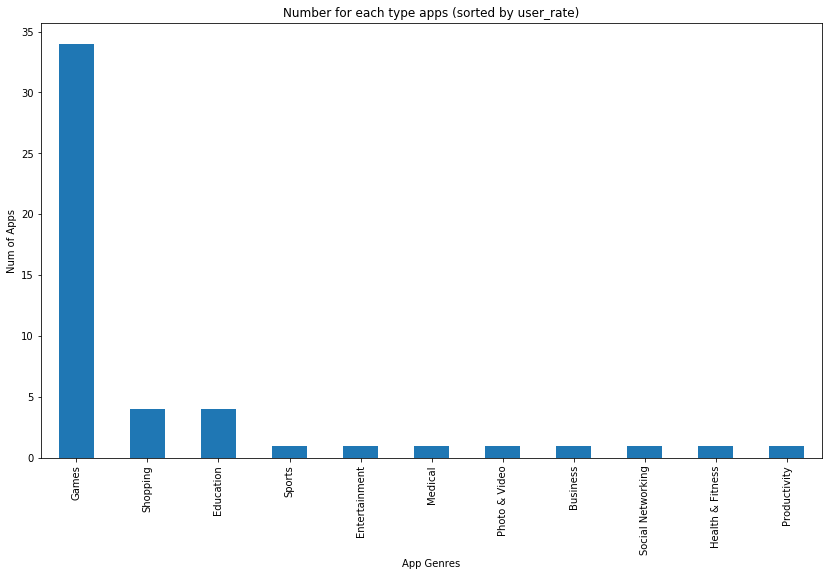

In [10]:
sorted_data = data.sort_values(by=['Average_Rating_All'],ascending=False)
sorted_data['Primary_Genre'][0:50].value_counts().plot(kind = 'bar',figsize=(14,8), title="Number for each type apps (sorted by user_rate)")
plt.xlabel("App Genres")  
plt.ylabel("Num of Apps")

Text(0, 0.5, 'Num of Apps')

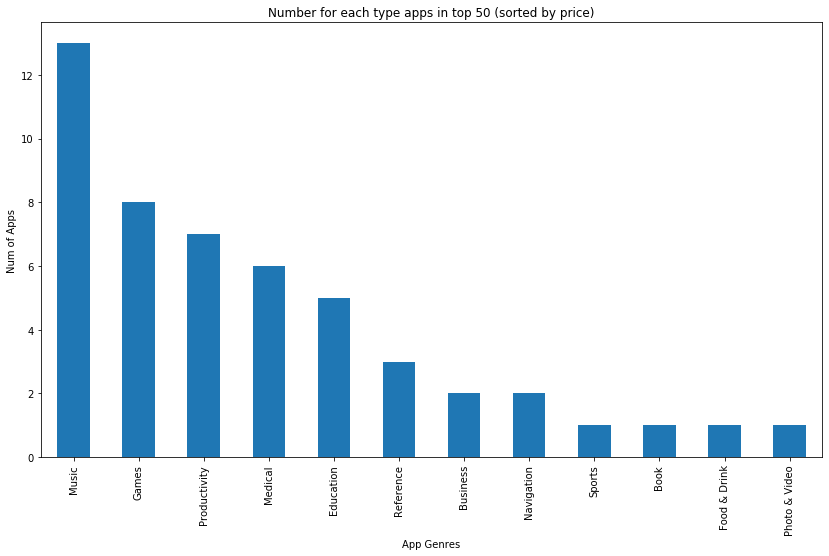

In [11]:
sorted_data = data.sort_values(by=['App_Price'],ascending=False)
sorted_data['Primary_Genre'][0:50].value_counts().plot(kind = 'bar',figsize=(14,8), title="Number for each type apps in top 50 (sorted by price)")
plt.xlabel("App Genres")  
plt.ylabel("Num of Apps")

Text(0, 0.5, 'Num of Apps')

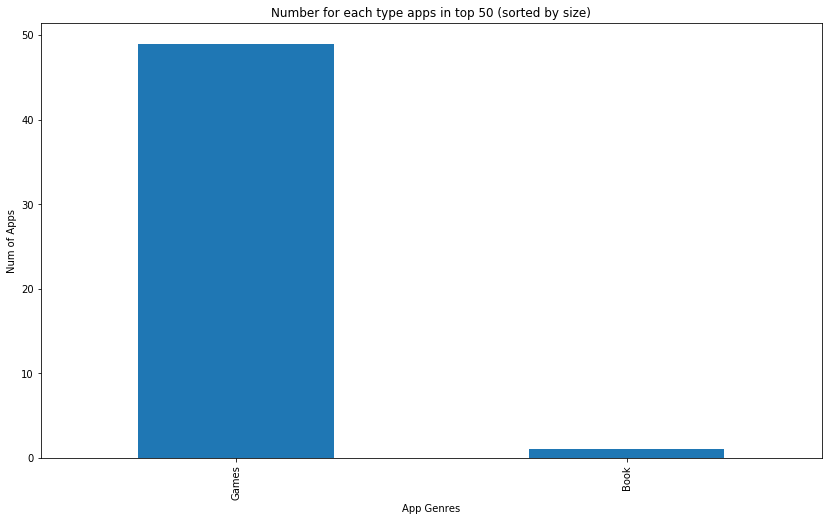

In [12]:
sorted_data = data.sort_values(by=['App_Size'],ascending=False)
sorted_data['Primary_Genre'][0:50].value_counts().plot(kind = 'bar',figsize=(14,8), title="Number for each type apps in top 50 (sorted by size)")
plt.xlabel("App Genres")  
plt.ylabel("Num of Apps")

    To make sure that game genre apps are important, I created another distribution graph which shows all genres with all the rating they earn. We can clearly see that,most of the game apps are earns a grade of rating in 4.0 and 4.5 which are high. It will also be shows more clearly in the second graph below. I creat an box plot to show the average rating for each type app.
    
    We can conclude that people are so nice in rating so they do not normally give bad rate to an app. However, in the range of 3.0 and 5.0 can really show whether an app is good or not. Therefore, due to our result here, we will go back for one step to Data Processing and to pick more accurary data we need.

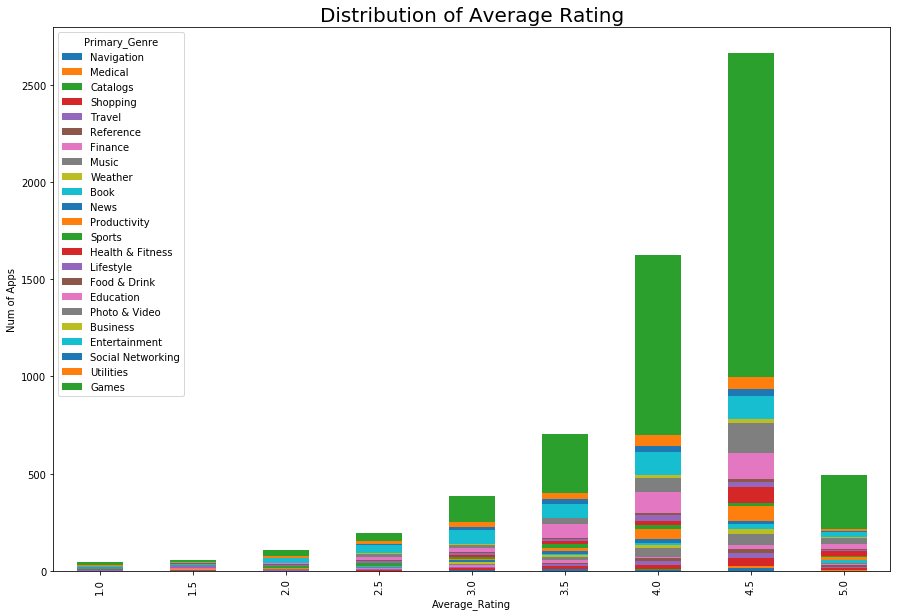

In [13]:
new_df = data.groupby(['Average_Rating_All','Primary_Genre'])['Average_Rating_All'].count().unstack('Primary_Genre').fillna(0)
genres = data['Primary_Genre'].drop_duplicates(keep="last")
new_df[genres].plot(kind='bar', stacked=True)
plt.xlabel("Average_Rating")  
plt.ylabel("Num of Apps")
plt.title("Distribution of Average Rating",fontsize=20)
plt.gcf().set_size_inches(15, 10)

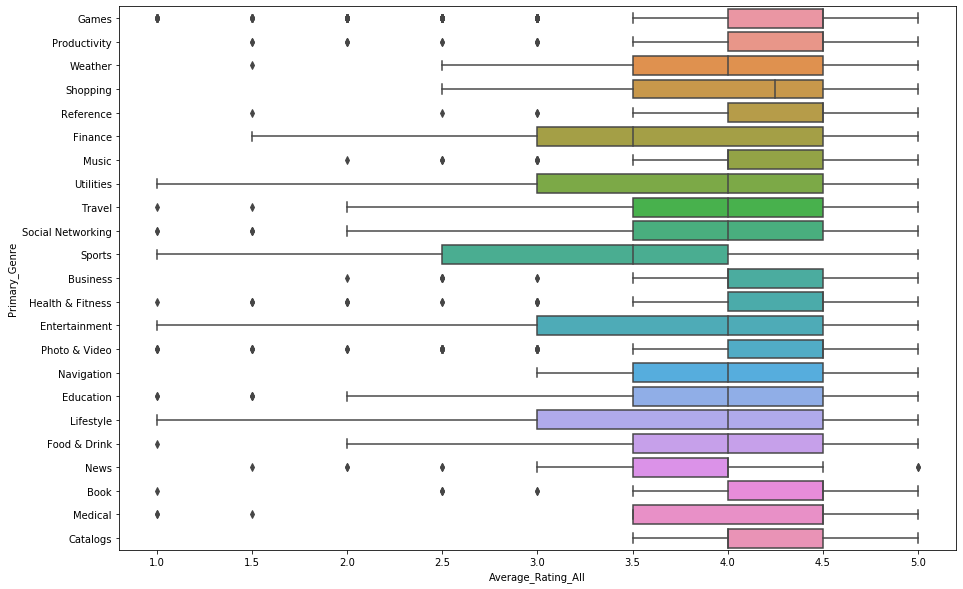

In [14]:
sns.boxplot(x="Average_Rating_All", y="Primary_Genre", data= data)
plt.gcf().set_size_inches(15, 10)

Here, we are back to Data Processing. According to the result we have above, Games Gener is the most popular Genre in the application market. As a programmer, if I am going to working on application design, I will prefer Game Apps. Therefore, we focus on Game Genre and to have a more accuarcy data I will only choose the games with a rating between 2.5 and 5.0 (We assume people are nice while rating, therefore, 2.5 is kind of low rate for an app). After that, I sort the data by User_Rating_Count_All since I want to know how to get the most users.

In [15]:
game_data = data.loc[data['Primary_Genre'] == 'Games']
game_data = game_data.loc[game_data['Average_Rating_All'] >= 2.5]
game_data = game_data.sort_values(by=['User_Rating_Count_All'],ascending=False)
game_data

,App_Name,App_Size,App_Price,User_Rating_Count_All,User_Rating_Count_Curr,Average_Rating_All,Average_Rating_Curr,Content_Rating,Primary_Genre,Language_Support_Number
1346,Clash of Clans,116476928,0.00,2130805,579,4.5,4.5,9,Games,18
707,Temple Run,65921024,0.00,1724546,3842,4.5,4.0,9,Games,1
1493,Candy Crush Saga,222846976,0.00,961794,2453,4.5,4.5,4,Games,24
275,Angry Birds,175966208,0.00,824451,107,4.5,3.0,4,Games,10
1246,Subway Surfers,156038144,0.00,706110,97,4.5,4.0,9,Games,1
...,...,...,...,...,...,...,...,...,...,...
6476,Montessori Nature,199166976,2.99,1,1,5.0,5.0,4,Games,1
4972,GUNTAI,73180160,3.99,1,1,4.0,4.0,9,Games,1
3466,LINE FIGHTERS,136356864,0.00,1,1,5.0,5.0,4,Games,4
5911,脱出ゲーム 古城からの脱出,131070976,0.00,1,1,4.0,4.0,12,Games,1


# Summary Statistics

Now we have the data for all game genre apps and we generated the rating between 2.5 and 5.0. I create a correlation matrix to help us understand the relaship between each factors. We found that App_Size and App_Price have positive correlation,which is reasonable. Hoever, App_Price and User_Rating_Count have negative correlation.

Therefore, larger size app worth more but higher price reduce the number of user. At the same time, language support number seems also have possitive correlation to User Rating Count which means the more languages are supported, the more user it might have.

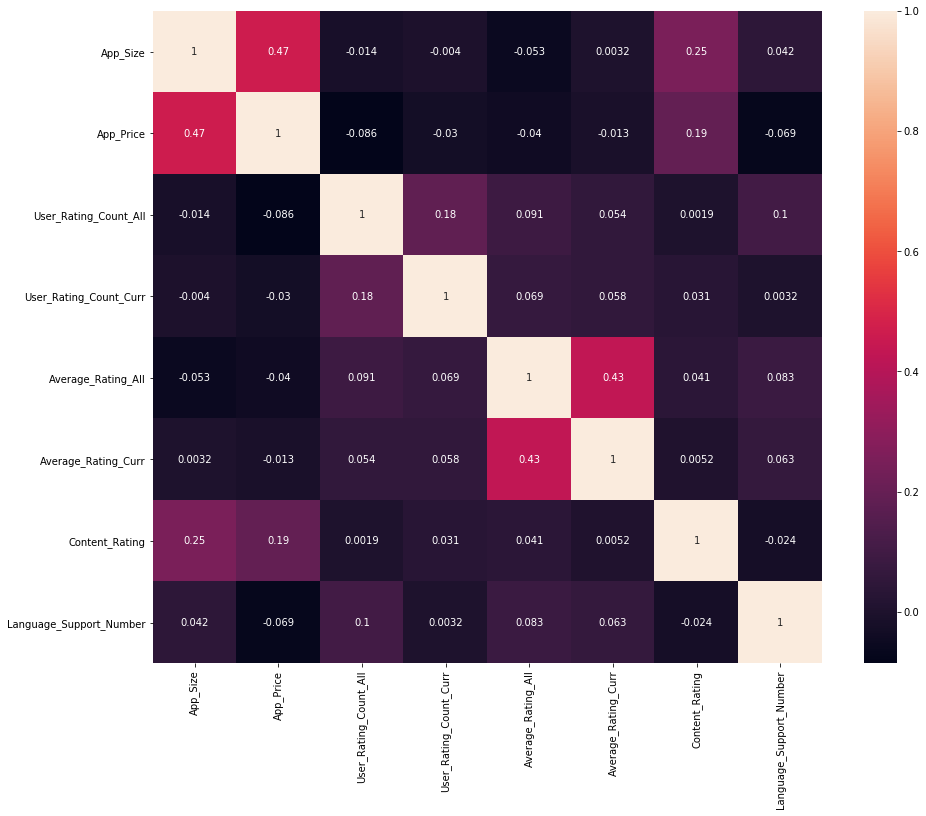

In [16]:
plt.figure(figsize=(15,12))
sns.heatmap(game_data.corr(), annot=True)
plt.show()

Now, we focus on comparing how does price, size, and content_rating effects user number and rating.

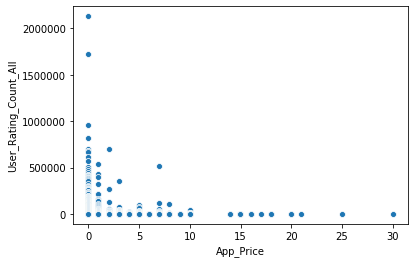

In [17]:
sns.scatterplot(game_data['App_Price'],game_data['User_Rating_Count_All'])

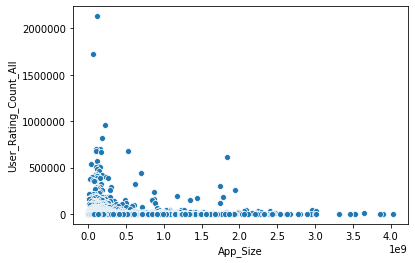

In [18]:
sns.scatterplot(game_data['App_Size'],game_data['User_Rating_Count_All'])

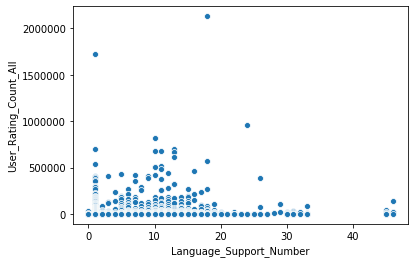

In [19]:
sns.scatterplot(game_data['Language_Support_Number'],game_data['User_Rating_Count_All'])

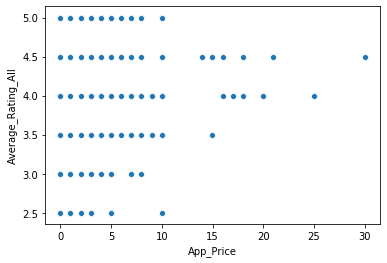

In [20]:
sns.scatterplot(game_data['App_Price'],game_data['Average_Rating_All'])

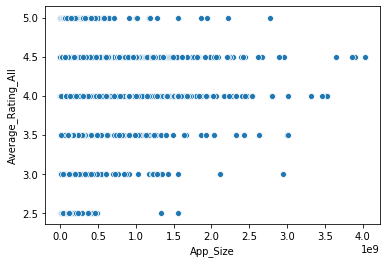

In [21]:
sns.scatterplot(game_data['App_Size'],game_data['Average_Rating_All'])

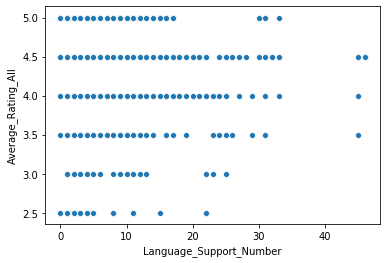

In [22]:
sns.scatterplot(game_data['Language_Support_Number'],game_data['Average_Rating_All'])

The scatter plot above show us whether price, size, and language support number affects on user number and rating. However, this data does not give us the most accuracy result since user rate count does not equivalence to the real user number of an application. It will be much better and accurate if the real user number or download number for an application is proved.

Therefore, from the graph price vs. rating amount and size vs. rating amount, we can clearly see that high rating amount application are concentrate at low app size and low price area. Although such a relationship is not a specific detail, it can be used as a reference factor. Let's choose applications with high-quality market value.

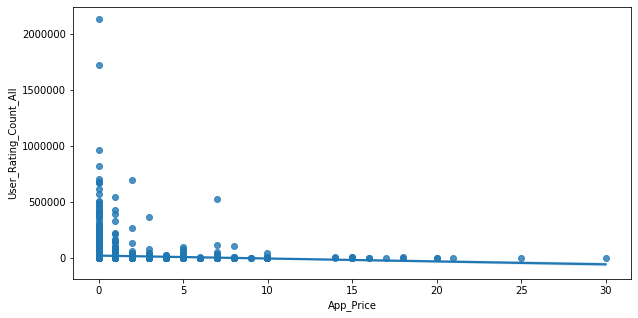

In [23]:
f, ax = plt.subplots(figsize=(10, 5))
sns.regplot(x="App_Price", y="User_Rating_Count_All", data=game_data, ax=ax)

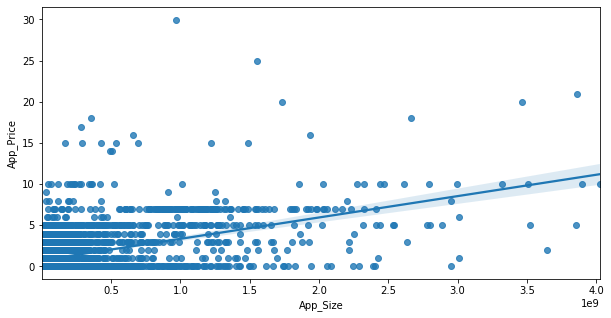

In [24]:
f, ax = plt.subplots(figsize=(10, 5))
sns.regplot(x="App_Size", y="App_Price", data=game_data, ax=ax)

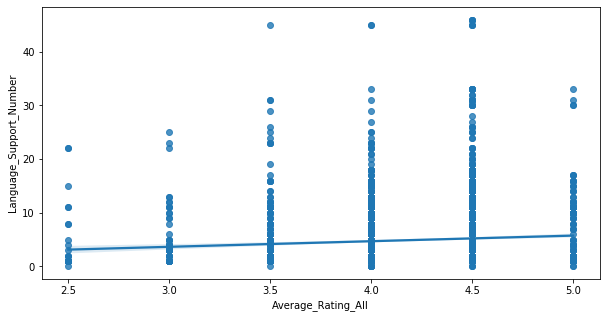

In [25]:
f, ax = plt.subplots(figsize=(10, 5))
sns.regplot(x="Average_Rating_All", y="Language_Support_Number", data=game_data, ax=ax)

In [26]:
reg1 = LinearRegression().fit(np.reshape(np.array(game_data['User_Rating_Count_All']),(-1,1)), game_data['App_Price'])
print("slope: "+str(reg1.coef_))
print("intercept: "+str(reg1.intercept_))
print("R: " + str(np.sqrt(reg1.score(np.reshape( np.array(game_data['User_Rating_Count_All']),(-1,1)),game_data['App_Price']))))

slope: [-2.81875955e-06]
intercept: 1.560586329994995
R: 0.08567919317550969


In [27]:
reg1 = LinearRegression().fit(np.reshape(np.array(game_data['User_Rating_Count_All']),(-1,1)), game_data['Language_Support_Number'])
print("slope: "+str(reg1.coef_))
print("intercept: "+str(reg1.intercept_))
print("R: " + str(np.sqrt(reg1.score(np.reshape( np.array(game_data['User_Rating_Count_All']),(-1,1)),game_data['Language_Support_Number']))))

slope: [8.69392171e-06]
intercept: 4.806617970513743
R: 0.1043832205961751


From the scatter plot above, we can see that these factors are indeed related to the number of rating people. The regression line also shows that the price is inversely proportional to the number of people, and the size is inversely proportional to the number of people (perhaps because small apps are easier to popularize and more widely applicable). There is no obvious linear relationship between the number of languages and the number of people. Therefore, we can consider these factors in application development. Of course, these data can not show the specific content of an application. Different contents may affect these factors to a great extent and produce special cases contrary to the conjecture. However, through the analysis of big data, we can make a big direction choice without considering the content of the application.

# Classification Model

To do the classification, we first need to clean up the data and find the training set and test set we are going to use. I am still interesting in the relationship between the three factor above to the Rating Amount. Following are the data been separated

In [37]:
# separating data and Set the training set and testing set

factors_data = game_data[['App_Price', 'App_Size', 'Language_Support_Number']]

x = np.asarray(factors_data)
y = np.asarray(game_data['User_Rating_Count_All'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

# Logistic regression

Logistic regression is a regression model that measures the relationship between the dependent variable (categorical) and a set of the independent variables using a logistic function.

In [29]:
# Logistic Regression
reg = LogisticRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

# Accuracy
kfold = KFold(n_splits=10, random_state=7)
result = cross_val_score(reg, x, y, cv=kfold, scoring='accuracy')
print("Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (result.mean()*100, result.std()*100))

Mean Accuracy = 0.00% - SD Accuracy = 0.00%


# K-Nearest Neighbors

The k-nearest neighbors algorithm, aka knn, is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure. 

In [31]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

# Accuracy
kfold = KFold(n_splits=10, random_state=7)
result = cross_val_score(knn, x, y, cv=kfold, scoring='accuracy')
print("Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (result.mean()*100, result.std()*100))

Mean Accuracy = 0.00% - SD Accuracy = 0.00%


# Decision Tree

Decision tree is a mechanical way to make decisions by dividing the input into smaller decisions. It consists of nodes, branches and leaf nodes. The node tests the values of some attributes. The edge corresponds to the test result and connects to the next node or leaf. The leaf node predicts the result. More about decision trees.

In [33]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test) 

# Accuracy
kfold = KFold(n_splits=10, random_state=7)
result = cross_val_score(dtree, x, y, cv=kfold, scoring='accuracy')
print("Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (result.mean()*100, result.std()*100))

Mean Accuracy = 0.00% - SD Accuracy = 0.00%


# Random Forest

A random forest, or random decision forest, is composed of many decision trees. It builds a decision tree for randomly selected data samples, gets the prediction from each tree, and selects the optimal solution by voting.

In [35]:
forest = RandomForestClassifier(n_estimators=100)
forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)

# Accuracy
kfold = KFold(n_splits=10, random_state=7)
result = cross_val_score(forest, x, y, cv=kfold, scoring='accuracy')
print("Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (result.mean()*100, result.std()*100))

Mean Accuracy = 0.00% - SD Accuracy = 0.00%


# Support Vector Machine

A support vector machine algorithm finds a hyperplane in an n-dimensional space that distinctly classifies the data points. 

In [36]:
svm = SVC()
svm.fit(x_train, y_train)
y_pred=svm.predict(x_test)

# Accuracy
kfold = KFold(n_splits=10, random_state=7)
result = cross_val_score(svm, x, y, cv=kfold, scoring='accuracy')
print("Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (result.mean()*100, result.std()*100))

Mean Accuracy = 0.00% - SD Accuracy = 0.00%


# Conclusion

Unfortunately, in the data set we found, we were not able to analyze enough reasons for the impact of price, size, and a number of supported languages on the number of users. Although we found a certain correlation between them in the histogram and matrix diagram. However, in the later analysis, we also learned that the number of ratings does not represent the actual number of users (many users do not have the habit of rate). Therefore, the data we get can not accurately express our conjecture. If we can find more accurate data, such as the actual number of users and the number of downloads. Maybe we can get different answers. Of course, such analysis is only to find out the high-quality product categories and features in many applications for programmers' reference. Through such analysis, we can know what kind of products have market value and make the best choice in the application creation.